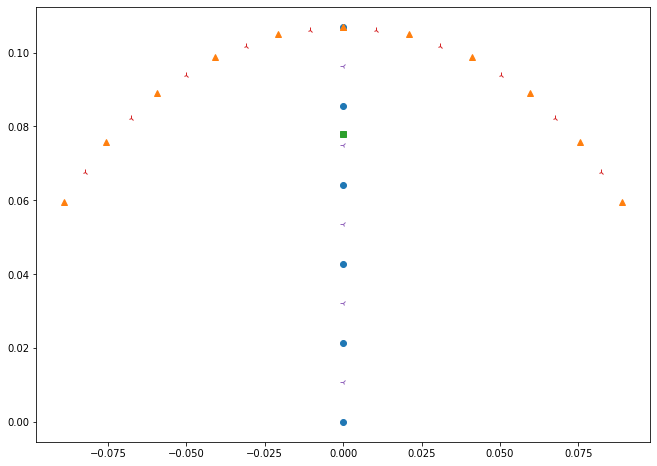

In [1]:
%run 3phase_pm_engine_simulation.ipynb

In [2]:
from tqdm.notebook import trange
import pandas as pd

In [3]:
possible_densities = tf.random.uniform((1_000_000, 16), minval=5, maxval=50, dtype="float32", seed=42)
parameters = tf.random.uniform((1_000_000, 12), minval=16, maxval=24, dtype="float32", seed=42)

In [4]:
parameters = tf.concat([possible_densities, parameters], axis=1)

In [5]:
good_params = []
for index in trange(parameters.shape[0]):
    _, mass = calculate_center_of_mass(parameters[index])
    if 4 <= mass <= 8:
        good_params.append(parameters[index].numpy())

  0%|          | 0/1000000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [6]:
df = pd.DataFrame.from_records(np.array(good_params))

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,27.773333,21.271492,7.017729,48.747475,42.277481,23.656282,32.074966,20.281408,30.789621,15.631498,...,17.133747,22.606588,16.506767,17.657707,20.342266,19.280014,18.021919,20.946796,20.862022,17.425449
1,34.319118,44.016266,16.454298,17.266167,25.914997,18.146740,14.453725,24.174446,46.995750,23.783478,...,18.546715,18.578320,21.150688,22.086393,22.551804,21.858662,22.579168,20.011345,18.322826,20.263067
2,43.871029,12.383644,34.497326,34.079227,30.555342,11.459092,11.628479,40.820404,16.642155,13.737366,...,16.156406,19.722172,18.197456,20.612267,18.325935,21.762630,18.969744,22.771824,19.505348,16.862606
3,23.186848,35.054733,17.826324,13.314231,15.150826,20.469898,18.322334,19.529457,25.762020,35.788277,...,21.751318,16.155315,18.032242,20.784483,16.300301,16.404156,20.576942,23.153093,23.801273,18.555056
4,19.152815,43.562790,5.547171,16.049757,46.884319,30.429159,23.046026,30.255316,17.863091,33.350670,...,19.332420,22.224136,17.573910,18.823631,17.627148,16.522755,21.472584,20.468658,23.485134,22.451777


In [8]:
df.shape

(168676, 28)

In [9]:
df.to_csv("params.csv", index=False, header=False)

In [3]:
t = np.linspace(0, 120, 1000)

In [4]:
df = pd.read_csv("params.csv", header=None)

In [5]:
good_params = df.to_numpy()
good_params = [tf.constant(g, dtype="float32") for g in good_params]

In [9]:
!pip install importnb

In [21]:
def calc_efficiency(index, chunk):
    import tensorflow as tf
    import importnb
    import pandas as pd
    import numpy as np
    t = np.linspace(0, 120, 1000)
    with importnb.Notebook():
        import _phase_pm_engine_simulation as es
        import center_of_mass_calculation as cmc
        calculate_center_of_mass = cmc.calculate_center_of_mass
        local_result = []
        for i in range(len(chunk)):
            eff = es.evaluate_efficiency(chunk[i], t)
            print(eff)
            local_result.append(eff.numpy())
            df = pd.DataFrame(local_result)
            df.to_csv(f"eff_chunk_{index}.csv", index=False, header=False)

In [22]:
from multiprocess import Process
import multiprocess
# multiprocess.set_start_method('spawn')
chunks = [(i, good_params[i*10_000:min(i*10_000 + 10_000, 168676)]) for i in range(17)]
processes = []
for chunk in chunks:
    processes.append(Process(target=calc_efficiency, args=chunk))
    
for p in processes:
    p.start()
    
for p in processes:
    p.join()

Process Process-86:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.9/dist-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_2615/118926433.py", line 13, in calc_efficiency
  File "/notebooks/3phase_pm_engine_simulation.ipynb", line 125, in evaluate_efficiency
    r, m = calculate_center_of_mass(parameters)
NameError: name 'calculate_center_of_mass' is not defined


<Figure size 792x576 with 1 Axes>


Process Process-87:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.9/dist-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_2615/118926433.py", line 13, in calc_efficiency
  File "/notebooks/3phase_pm_engine_simulation.ipynb", line 125, in evaluate_efficiency
    r, m = calculate_center_of_mass(parameters)
NameError: name 'calculate_center_of_mass' is not defined


<Figure size 792x576 with 1 Axes>


Process Process-88:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.9/dist-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_2615/118926433.py", line 13, in calc_efficiency
  File "/notebooks/3phase_pm_engine_simulation.ipynb", line 125, in evaluate_efficiency
    r, m = calculate_center_of_mass(parameters)
NameError: name 'calculate_center_of_mass' is not defined


<Figure size 792x576 with 1 Axes>


Traceback (most recent call last):
  File "<string>", line 1, in <module>


KeyboardInterrupt: 

  File "/usr/local/lib/python3.9/dist-packages/multiprocess/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/usr/local/lib/python3.9/dist-packages/multiprocess/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
  File "/usr/local/lib/python3.9/dist-packages/dill/_dill.py", line 373, in load
    return Unpickler(file, ignore=ignore, **kwds).load()
  File "/usr/local/lib/python3.9/dist-packages/dill/_dill.py", line 646, in load
    obj = StockUnpickler.load(self)
  File "/usr/local/lib/python3.9/dist-packages/dill/_dill.py", line 636, in find_class
    return StockUnpickler.find_class(self, module, name)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/__init__.py", line 29, in <module>
    import distutils as _distutils
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 982, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 925, in _

<Figure size 792x576 with 1 Axes>


In [16]:
efficiencies = []

In [6]:
for i in trange(len(good_params)):
    eff = evaluate_efficiency(good_params[i], t)
    efficiencies.append(eff.numpy())
    if i >= 1000 and i % 1000 == 0:
        df = pd.DataFrame(efficiencies)
        df.to_csv("calculated_efficiencies.csv", index=False, header=False)

  0%|          | 0/168676 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [55]:
df = pd.DataFrame(efficiencies)
df.to_csv("calculated_efficiencies.csv", index=False, header=False)

In [56]:
df = pd.DataFrame(np.array(efficiencies))

In [57]:
df.mean()

0    0.511146
dtype: float32

In [58]:
df.std()

0    0.067722
dtype: float32

In [59]:
df.max()

0    0.784475
dtype: float32

In [60]:
df.min()

0    1.565178e-08
dtype: float32

In [61]:
df.head()

,0
0,0.567362
1,0.470978
2,0.551705
3,0.491741
4,0.520799


In [17]:
pdf = pd.read_csv("params.csv", header=None, index_col=False)
pdf.reset_index(inplace=True, drop=True)

In [20]:
chunks = []
for i in range(8):
    chunk_df = pd.read_csv(f"eff_chunk_{i}.csv", header=None, index_col=False)
    chunks.append(chunk_df)
    
df = pd.concat(chunks, axis=0)
df.reset_index(inplace=True, drop=True)

In [21]:
df.index

RangeIndex(start=0, stop=168676, step=1)

In [23]:
full_df = pd.concat([pdf, df], axis=1, ignore_index=True)
full_df.columns = [i for i in range(29)]

In [31]:
full_df.to_csv("full_df.csv", index=False, header=False)

In [32]:
full_df = pd.read_csv("full_df.csv", header=None)

In [33]:
full_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,...,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,168676.000000,1.686760e+05
mean,25.474876,25.393624,25.458030,25.444342,25.416469,25.853215,25.876987,25.864601,25.779938,25.694248,...,20.004195,20.046714,20.329314,20.005894,20.005798,20.005070,20.020488,20.043900,20.334305,5.136112e-01
std,12.796902,12.767546,12.783671,12.801518,12.794439,12.867159,12.872714,12.864412,12.845241,12.853611,...,2.306808,2.287594,2.250637,2.311673,2.307875,2.311502,2.301031,2.290410,2.256245,6.173697e-02
min,5.000402,5.000150,5.000536,5.000011,5.000086,5.000231,5.000129,5.000021,5.000220,5.000408,...,16.000040,16.000013,16.000038,16.000063,16.000078,16.000027,16.000040,16.000038,16.000126,1.417582e-08
25%,14.315822,14.289331,14.334754,14.254733,14.253843,14.637273,14.667131,14.621394,14.604817,14.502232,...,18.010168,18.089337,18.478952,18.005521,18.012688,18.008364,18.032707,18.080129,18.462955,4.838380e-01
50%,24.517040,24.392945,24.498492,24.536768,24.447207,25.077008,25.077659,25.144688,24.941940,24.799024,...,20.002634,20.057126,20.470802,20.006597,19.998942,20.004051,20.029111,20.059674,20.482519,5.138777e-01
75%,36.078326,35.988966,36.068558,36.054601,36.035650,36.669046,36.677391,36.667465,36.536675,36.503062,...,22.005004,22.024314,22.270613,22.006491,22.007065,22.008914,22.014625,22.020444,22.292068,5.464295e-01
max,49.997710,49.999800,49.999878,49.999500,49.998325,49.999740,49.998604,49.999780,49.999996,49.999855,...,23.999882,23.999956,23.999977,23.999962,23.999996,23.999970,23.999992,23.999990,23.999973,8.224433e-01
